In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Condiciones iniciales

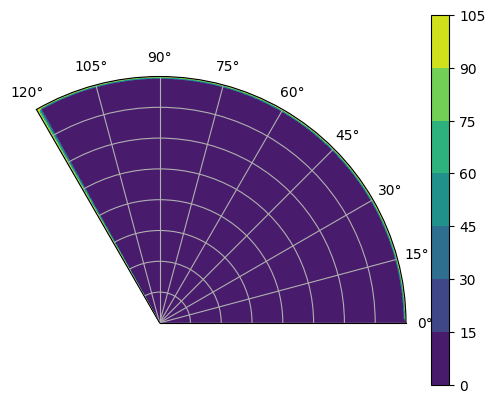

In [67]:
r_len = np.linspace(0, 2, 100)
theta_len = np.linspace(0, 2*np.pi/3, 100)
R, THETA = np.meshgrid(r_len, theta_len)
Psi_sol = np.zeros(THETA.shape)

theta_0 = 0
theta_f = r_f = 100

Psi_sol[-1].fill(r_f)
Psi_sol[1:,0].fill(theta_0)
Psi_sol[1:,-1].fill(theta_f)

# Gráfica
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf( theta_len, r_len, Psi_sol)
plt.colorbar(ctf)
plt.axis([0, 2*np.pi/3, 0, 2])
plt.show()

# Solución ecuación de Laplace

In [68]:
dr = np.mean(np.diff(r_len))  # Intervalo de r
dtheta = np.mean(np.diff(theta_len))   # Intervalo de theta

# derivadas involucradas en g
def diff_forward_r(r, t):
  return Psi_sol[r+1][t]

def diff_backward_r(r, t):
  return Psi_sol[r-1][t]

def diff_forward_theta(r, t):
  return Psi_sol[r][t+1]

def diff_backward_theta(r, t):
  return Psi_sol[r][t-1]

#g(r,theta,deltar,delta theta)
def g(r, t, dr, dtheta):
  return (diff_forward_r(r, t) + diff_backward_r(r, t))/(2*np.power(dr,2)) + diff_forward_r(r, t)/(r_len[r]*dr) + (diff_forward_theta(r, t) + diff_backward_theta(r, t))/(2*np.power(r_len[r]*dtheta, 2))  

# solución eq Laplace
def sol_laplace(Psi_sol, r_len, theta_len, dr, dtheta, n):
  ss = 0
  l = len(r_len) - 1

  while ss < n:
      r = t = 1
      
      while r < l:
          t = 1

          while t < l:
              Psi_sol[r][t] = g(r, t, dr, dtheta) / (1/np.power(dr,2)+1/(r_len[r]*dr)+1/np.power(r_len[r]*dtheta, 2))
              t += 1
              
          r += 1
      ss += 1
  return Psi_sol

# Gráfica

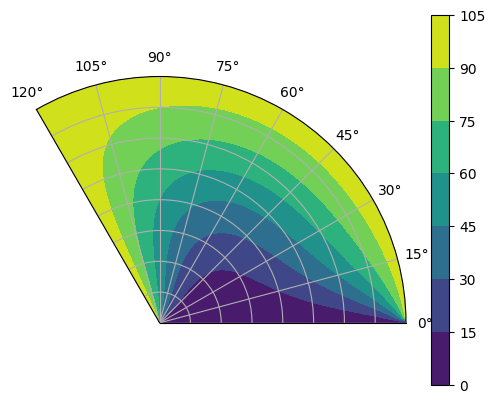

In [69]:
Psi_sol = sol_laplace(Psi_sol, r_len, theta_len, dr, dtheta, 1000)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf( theta_len, r_len, Psi_sol)
plt.colorbar(ctf)
plt.axis([0, 2*np.pi/3, 0, 2])
plt.show()

#  Condiciones iniciales con valores de dependen de $r, \theta$



*   $\psi(1,\theta) = 100cos(\theta)$
*   $\psi(r,0) = 100r$
* $\psi(r,2\pi) = 100r$




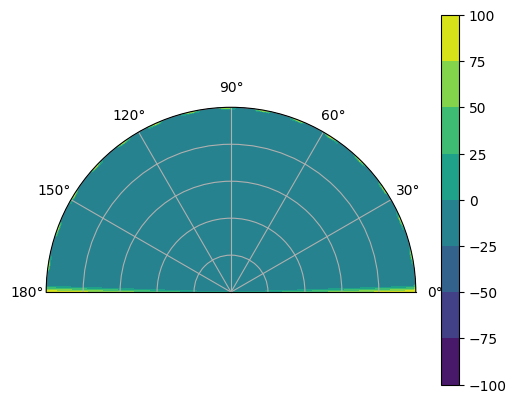

In [70]:
r_len = np.linspace(0, 1, 100)
theta_len = np.linspace(0, np.pi, 100)
R, THETA = np.meshgrid(r_len, theta_len)
Psi_sol = np.zeros(THETA.shape)

def r_f(i):
  return 100*np.cos(i)

def theta_i(i):
  return 100*r_len[i]

def theta_f(i):
  return 100*r_len[i]

#Aplicar condiciones iniciales
for i in range(len(r_len)):
  Psi_sol[-1, i] = r_f(i)

for i in range(len(r_len) -1):
  Psi_sol[1:, 0][i] = theta_i(i)
  Psi_sol[1:, -1][i] = theta_f(i)


# Gráfica
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf( theta_len, r_len, Psi_sol)
plt.colorbar(ctf)
plt.axis([0, np.pi, 0, 1])
plt.show()

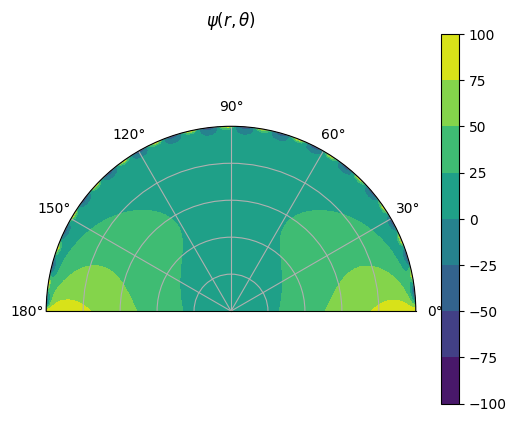

In [71]:
# Solución
Psi_sol = sol_laplace(Psi_sol, r_len, theta_len, dr, dtheta, 1000)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf( theta_len, r_len, Psi_sol)
plt.colorbar(ctf)
plt.axis([0, np.pi, 0, 1])
plt.title(r'$\psi(r,\theta)$')
plt.show()